In [1]:
import pandas as pd
product_df = pd.read_csv( "/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/product_data.csv", 
                         dtype={'product_code':str})

product_df.head(5)

/Users/svattiku/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,0,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,300785147.0,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback
1,1,MMID_2041,1981-10-18,male,NaN,452001,2016-06-21,2655,MM-INDORE-MALHAR MEGA MALL,21,57836,NONPROMO,NaN,1000315939.0,SOO FRESH ROLL PIZZA 1PLT,40.0,Payback
2,2,MMID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,MM-INDORE-MALHAR MEGA MALL,21,43394,NONPROMO,NaN,1000314595.0,SOO FRESH PUFF PEAS & POTATO 1PLT,35.0,Payback
3,3,MMID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,MM-INDORE-MALHAR MEGA MALL,21,39335,NONPROMO,NaN,300930107.0,SOFRSH VD EGGS REGULAR 6P,72.0,Payback
4,4,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,1000010393.0,SOO FRESH BREAD BROWN 400g,15.0,Payback


In [2]:
#product_df.head(5)

product_code_desc_df = product_df[['product_code', 'product_description']].copy()
product_code_desc_df = product_code_desc_df.sort_values(['product_code', 'product_description'])
product_code_desc_df = product_code_desc_df.drop_duplicates(['product_code', 'product_description'])
product_code_desc_df.to_csv("/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/product_code_desc_map.csv")

## Products, prices and counts

In [3]:
#Products with least and/or negative Prices
product_price_df = product_df[['product_description', 'sale_price_after_promo']].copy()
product_negative_price_df = product_price_df.sort_values(['sale_price_after_promo'])
product_negative_price_df.head(50).to_csv("/Users/svattiku/Google Drive/BDA/ProjectBDA/Descriptive/ProductsNegativePrices.csv")
product_negative_price_df.head(10)


,product_description,sale_price_after_promo
7844204,HUL PUREIT INTELLA STORAGE WATER PURIFIE,-62937.0
6344467,LG LSA5AF3D 1.5T 3S SAC,-36590.0
5130629,KORYO 1.5T PORTABLE AC KPA18AF,-28990.0
4806227,KORYO 1.5T PORTABLE AC KPA18AF,-26991.0
6267720,Koryo 1.5T 2S Window AC KWR18AO2S,-22290.0
6346599,AGROFRESH WHOLE WHEAT ATTA PP 10Kg,-19670.0
6346572,MASOOR DAL STD LOOSE,-13500.0
6146390,KORYO 32 Super Slim HDR KLE32EXHN80,-12990.0
4806225,Koryo 190L DC Refrigerator KDR210DS3F,-11500.0
4842182,Symphony diet 50i tower cooler,-10491.0


In [4]:
#Highest priced items

prod_price_sorted = product_price_df.sort_values(['sale_price_after_promo'], ascending=False)
prod_price_sorted.head(50).to_csv("/Users/svattiku/Google Drive/BDA/ProjectBDA/Descriptive/ProductsTop50Prices.csv")

prod_price_sorted.head(10)

,product_description,sale_price_after_promo
4476263,Cosmos3 600ml+1000ml+1500ml,252225.00
1714915,KORYO 32 Super Slim HDR KLE32EXHN80,199485.05
4243714,Tawa+ Fry Pan Combi Pack,151696.00
7816580,Alu Pr Cooker OL - 5Ltr - IB - Favourite,149410.00
4238466,SUNLAND SUNFLOWER OIL JR 5L,114400.00
4278951,21Pcs New La Opala D/Set-Blissful Greens,101250.00
4278956,21Pcs New La Opala D/Set-Silken Charm,101250.00
1612460,D-Samsung 55K5570 Full HD Smart LED TV,99911.00
4476264,HALDIRAM SOANPAPDI PP 500g,97920.39
6663866,RAW RICE SONAM LOOSE,91650.00


In [5]:
product_units_sold = product_df.groupby(['product_description']).size() \
  .sort_values(ascending=False) \
  .reset_index(name='count') \
  .drop_duplicates(subset='product_description')

product_units_sold

,product_description,count
0,BB-CB-27X30X208SWG NEW,60994
1,BB-CB-20X25X208SWG NEW,58437
2,SUGAR MEDIUM LOOSE,51338
3,BB-CB-20X25X168SWG-Suitable for ROI New,41500
4,TOMATO LOOSE,35307
5,BB-CB-27X30X168SWG-Suitable for ROI New,34794
6,Fiber bag 45 GSM 20x25,31149
7,ONION LOOSE,27963
8,TATA SALT PP 1Kg,27727
9,POTATO LOOSE,25360


In [6]:
product_units_sold.head(50).to_csv('/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/Top50productsAcrossAllStores.csv')

In [7]:
product_units_sold_by_store = product_df.groupby(['store_description','product_description']).size() \
  .sort_values(ascending=False) \
  .reset_index(name='count') \
  .drop_duplicates(subset='product_description')

product_units_sold_by_store

,store_description,product_description,count
0,MM-JAMSHEDPUR-NH-33,BB-CB-27X30X208SWG NEW,28015
1,MM-INDORE-MALHAR MEGA MALL,TOMATO LOOSE,21086
2,MM-JAMSHEDPUR-NH-33,BB-CB-20X25X208SWG NEW,19112
3,MM-INDORE-MALHAR MEGA MALL,POTATO LOOSE,16040
4,MM-INDORE-MALHAR MEGA MALL,ONION LOOSE,15534
5,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,SUGAR MEDIUM LOOSE,15455
8,MM-AMRITSAR-TRILIUM MALL,Fiber bag 45 GSM 20x25,14781
9,MM-INDORE-MALHAR MEGA MALL,BB-CB-27X30X168SWG-Suitable for ROI New,14619
10,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,BB-CB-20X25X168SWG-Suitable for ROI New,13809
12,MM-INDORE-MALHAR MEGA MALL,CUCUMBER GREEN LOOSE,13146


In [8]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-MADURAI-KOCHADAI VILLAGE'].head(20)

,store_description,product_description,count
18,MM-MADURAI-KOCHADAI VILLAGE,TOMATO COUNTRY,11131
37,MM-MADURAI-KOCHADAI VILLAGE,FB VG ONION BUDGET PACK,7380
71,MM-MADURAI-KOCHADAI VILLAGE,POMEGRANATE REGULAR LOOSE,4817
76,MM-MADURAI-KOCHADAI VILLAGE,FB VG POTATO BUDGET PACK,4668
81,MM-MADURAI-KOCHADAI VILLAGE,FB FR BANANA ROBUSTA,4254
89,MM-MADURAI-KOCHADAI VILLAGE,COCONUT HUSK LARGE,4177
95,MM-MADURAI-KOCHADAI VILLAGE,CHILLI LIGHT GREEN,4033
100,MM-MADURAI-KOCHADAI VILLAGE,MANGO BANGANAPALLI,3844
107,MM-MADURAI-KOCHADAI VILLAGE,GOLD WINNER SUNFLOWER OIL PP 1L,3761
113,MM-MADURAI-KOCHADAI VILLAGE,APPLE SHIMLA LOOSE,3608


In [9]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-JAMSHEDPUR-NH-33'].head(20)

,store_description,product_description,count
0,MM-JAMSHEDPUR-NH-33,BB-CB-27X30X208SWG NEW,28015
2,MM-JAMSHEDPUR-NH-33,BB-CB-20X25X208SWG NEW,19112
26,MM-JAMSHEDPUR-NH-33,BB-CB-16X20X208SWG NEW,9854
96,MM-JAMSHEDPUR-NH-33,MOONG DAL STD LOOSE,4019
115,MM-JAMSHEDPUR-NH-33,ARWA SONACHUR PREMIUM LOOSE,3587
124,MM-JAMSHEDPUR-NH-33,DHARA KACHI GHANI MUSTARD OIL PP 1L,3492
128,MM-JAMSHEDPUR-NH-33,MASOOR DAL STD LOOSE,3415
147,MM-JAMSHEDPUR-NH-33,VIM UTENSL BAR 125g /130g,3272
183,MM-JAMSHEDPUR-NH-33,TATA CTC TEA GOLD PP 250g,2905
198,MM-JAMSHEDPUR-NH-33,FORTUNE SOYABEAN OIL PP 1L,2770


In [10]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-INDORE-MALHAR MEGA MALL'].head(20)

,store_description,product_description,count
1,MM-INDORE-MALHAR MEGA MALL,TOMATO LOOSE,21086
3,MM-INDORE-MALHAR MEGA MALL,POTATO LOOSE,16040
4,MM-INDORE-MALHAR MEGA MALL,ONION LOOSE,15534
9,MM-INDORE-MALHAR MEGA MALL,BB-CB-27X30X168SWG-Suitable for ROI New,14619
12,MM-INDORE-MALHAR MEGA MALL,CUCUMBER GREEN LOOSE,13146
14,MM-INDORE-MALHAR MEGA MALL,CORIANDER,12319
21,MM-INDORE-MALHAR MEGA MALL,FB SIS NAMKEENS,10827
25,MM-INDORE-MALHAR MEGA MALL,LADYFINGER LOOSE,9980
27,MM-INDORE-MALHAR MEGA MALL,BOTTLE GOURD LONG,9761
28,MM-INDORE-MALHAR MEGA MALL,Carrot English Loose,9578


In [11]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-AMRITSAR-TRILIUM MALL'].head(20)

,store_description,product_description,count
8,MM-AMRITSAR-TRILIUM MALL,Fiber bag 45 GSM 20x25,14781
547,MM-AMRITSAR-TRILIUM MALL,MANGO SAFEDA,1377
551,MM-AMRITSAR-TRILIUM MALL,RAJMA CHTRA WHITE LOOSE,1374
583,MM-AMRITSAR-TRILIUM MALL,BONN BREAD PRIME TIME BROWN PP 400g,1324
740,MM-AMRITSAR-TRILIUM MALL,Carrot Red,1123
876,MM-AMRITSAR-TRILIUM MALL,POTATO SUGARFREE PKD,1007
1025,MM-AMRITSAR-TRILIUM MALL,BONN BREAD SANDWICH SPECIAL PP 400g,907
1156,MM-AMRITSAR-TRILIUM MALL,MILKFOOD DESI GHEE RF 1L,826
1165,MM-AMRITSAR-TRILIUM MALL,BONN BREAD PRIME TIME BYRGER PP 225g,820
1173,MM-AMRITSAR-TRILIUM MALL,TTRT FRUIT BASED MANGO 2L,811


In [12]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-HUBLI-GOKUL ROAD-AKSHAY CEN'].head(20)

,store_description,product_description,count
5,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,SUGAR MEDIUM LOOSE,15455
10,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,BB-CB-20X25X168SWG-Suitable for ROI New,13809
13,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,TUR DAL PREM LOOSE,12378
31,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,Cloth Bag 20x25,8654
35,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,URAD DAL PREM LOOSE,7737
36,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,RUCHI GOLD PALMOLEIN OIL PP 1L,7696
41,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,GH DAILY WHO SPICE JEERA100g,6564
42,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,FUTANA FRIED LOOSE,6558
44,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,GROUNDNUT LOOSE,6372
46,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,MOONG DAL PREM LOOSE,6170


In [13]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-LUDHIANA-FEROZEPUR-MF'].head(20)


,store_description,product_description,count
571,MM-LUDHIANA-FEROZEPUR-MF,ROOH AFZA SHARBAT 750ml,1347
914,MM-LUDHIANA-FEROZEPUR-MF,FORTUNE KACHI GHANI MUSTARD OIL BT 1L,971
952,MM-LUDHIANA-FEROZEPUR-MF,CHANA KABULI PREM LOOSE,945
963,MM-LUDHIANA-FEROZEPUR-MF,MASHAL KACHI GHANI MUSTARD OIL BT 1L,939
2012,MM-LUDHIANA-FEROZEPUR-MF,FRESH & PURE KCHI GHNI MUSTRD OIL BT 1L,543
2243,MM-LUDHIANA-FEROZEPUR-MF,KURKURE ASSORTED LARGE 3*100g OP,503
2599,MM-LUDHIANA-FEROZEPUR-MF,TTRT FRUIT BASED JUICE LITCHI 2L,450
2646,MM-LUDHIANA-FEROZEPUR-MF,GH DAILY PULSES WHO MOONG PRM 1kg,445
2683,MM-LUDHIANA-FEROZEPUR-MF,VERKA GHEE 1 LT TETRA,439
2712,MM-LUDHIANA-FEROZEPUR-MF,SOO FRESH CHKN WTH SKIN BROILER LOOSE,436


In [14]:
product_units_sold_by_store[product_units_sold_by_store['store_description'] == 'MM-INDORE-TREASURE ISLAND'].head(20)



,store_description,product_description,count
52,MM-INDORE-TREASURE ISLAND,PB Card FVRL,5930
141,MM-INDORE-TREASURE ISLAND,SOFRSH VD BREAD WHITE 400g,3301
390,MM-INDORE-TREASURE ISLAND,SOFRSH VD BREAD WHOLE WHEAT 400g,1740
434,MM-INDORE-TREASURE ISLAND,BANANA MADRAS,1616
512,MM-INDORE-TREASURE ISLAND,SOFRSH TRF BREAD MILK 400g,1445
531,MM-INDORE-TREASURE ISLAND,SOFRSH TRF BREAD WHOLE WHEAT MLTGR 400g,1411
543,MM-INDORE-TREASURE ISLAND,AMUL MILK GOLD MILKY MILK PP 500ml,1380
688,MM-INDORE-TREASURE ISLAND,APPLE SHIMLA PKD,1186
714,MM-INDORE-TREASURE ISLAND,SOFRSH TRF BREAD WHITE 400g,1154
861,MM-INDORE-TREASURE ISLAND,SOFRSH TRF MUFFIN VANILLA 6P,1019


In [15]:
len(product_code_desc_df)

204130

In [16]:
product_df.loc[product_df['transaction_number_by_till'] == 11181]

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
329956,329956,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,NONPROMO,NaN,1000221186025.0,"LPY-3150-PRL-215-PY, XXL, NAVY",279.00,Payback
329957,329957,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,NONPROMO,NaN,1000220482005.0,"LPY-0010-PDP-206-PY, XXL, CORAL",279.00,Payback
329958,329958,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,NONPROMO,NaN,300785150.0,BB-CB-27X30X168SWG-Suitable for ROI New,6.00,Payback
329959,329959,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,NONPROMO,NaN,1000268699005.0,"LPY-0010-PDP-222-PY, XXL, offwhite",279.00,Payback
329960,329960,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,NONPROMO,NaN,1000226861006.0,"AW15-Ptd Economy SGL Blanket, DSN-06, NA",179.00,Payback
329961,329961,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,NONPROMO,NaN,1000226861002.0,"AW15-Ptd Economy SGL Blanket, DSN-02, NA",179.00,Payback
329962,329962,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,0001036572,"AZ B2@549,B3@699 FLAT KNIT CHURIDAR FS E",1000135637141.0,"LECB-0160-01-A-45-KC-PL-AL, XXL, YELLOW",233.00,Payback
329963,329963,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,0001036572,"AZ B2@549,B3@699 FLAT KNIT CHURIDAR FS E",1000135637145.0,"LECB-0010-01-A-45-KC-PL-AL, XXL, RED",233.00,Payback
329964,329964,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,0001036572,"AZ B2@549,B3@699 FLAT KNIT CHURIDAR FS E",1000135637142.0,"LECB-0010-01-A-45-KC-PL-AL, XXL, WHITE",466.00,Payback
329965,329965,MMID_2048580,1989-06-30,female,MADHYA PRADESH,452001,2015-11-15,2655,MM-INDORE-MALHAR MEGA MALL,19,11181,0001036572,"AZ B2@549,B3@699 FLAT KNIT CHURIDAR FS E",1000135637175.0,"LECB-0160-01-A-45-KC-PL-AL, XXL, BLACK",466.00,Payback


In [17]:
from efficient_apriori import apriori

product_df_txn_prod = product_df[['transaction_number_by_till', 'product_code']].copy()

#1
print (product_df_txn_prod.head(50))
print(len(product_df_txn_prod))

product_df_txn_prod = product_df_txn_prod.sort_values(['transaction_number_by_till', 'product_code'])

print (product_df_txn_prod.head(50))

#2
print(len(product_df_txn_prod))

product_df_txn_prod = product_df_txn_prod.drop_duplicates(['transaction_number_by_till','product_code'])

#3
print(len(product_df_txn_prod))
print (product_df_txn_prod.head(50))
#print (product_df_txn_prod.duplicated(['transaction_number_by_till']))
#print (product_df_txn_prod.duplicated(['product_code']))

transactions = product_df_txn_prod.groupby('transaction_number_by_till').apply(lambda x: x['product_code'].unique())

#4
print(len(transactions))


    transaction_number_by_till     product_code
0                        51535      300785147.0
1                        57836     1000315939.0
2                        43394     1000314595.0
3                        39335      300930107.0
4                        51535     1000010393.0
5                        47586      108100335.0
6                        72624      108100331.0
7                        72624      108100306.0
8                        72624      108100296.0
9                        51535     1000303810.0
10                       39335     1000324015.0
11                       39496     1000324015.0
12                       51535      108026926.0
13                       55053      300361324.0
14                        5229  1000040109035.0
15                        5229      300785123.0
16                       55053      108037502.0
17                       55053     1000334998.0
18                       55053     1000082165.0
19                       55053      1080

In [18]:
transactions.head(5)

transaction_number_by_till
1    [1000010405.0, 1000202202.0, 1000203563.0, 100...
2    [1000001292.0, 1000025076.0, 1000027990005.0, ...
3    [1000026523.0, 1000059431.0, 1000067846001.0, ...
4    [1000005204.0, 1000026523.0, 1000034447.0, 100...
5    [1000038202.0, 1000101098.0, 1000170065.0, 100...
dtype: object

In [19]:
transactions_df = transactions.to_frame()

In [20]:
transactions_df[transactions_df.columns[0]]

transaction_number_by_till
1             [1000010405.0, 1000202202.0, 1000203563.0, 100...
2             [1000001292.0, 1000025076.0, 1000027990005.0, ...
3             [1000026523.0, 1000059431.0, 1000067846001.0, ...
4             [1000005204.0, 1000026523.0, 1000034447.0, 100...
5             [1000038202.0, 1000101098.0, 1000170065.0, 100...
6             [1000019572.0, 1000026054.0, 1000078465.0, 100...
7                                  [1000237797.0, 1000556434.0]
8             [1000139248003.0, 1000139379003.0, 10001393950...
9             [1000053898.0, 1000070712.0, 1000070723.0, 100...
10            [1000013026.0, 1000036034.0, 1000066868.0, 100...
11            [1000000589.0, 1000001696.0, 1000019374.0, 100...
12            [1000001730.0, 1000019598.0, 1000019750003.0, ...
13            [1000023119.0, 1000026130.0, 1000067617.0, 100...
14            [1000016925.0, 1000026509.0, 1000096375009.0, ...
15            [1000001721.0, 1000029579.0, 1000030014.0, 100...
16           

In [21]:
#transactions_df[transactions_df.columns[0]]
#1.00061927e+09
#transactions_df = transactions_df.set_index(transactions_df.columns[0])

#transactions_df.index.isin(['1.00061927e+09'])


In [22]:
transactions_df.to_csv("/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/products_in_each_txn_df2.csv")

In [23]:
product_df_txn_prod.to_csv("/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/product_data_txn_item.csv", sep=',')

In [24]:
type(df2)
itemsets, rules = apriori(transactions, min_support=0.0002,  min_confidence=1)

NameError: name 'df2' is not defined

In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule) # Prints the rule and its confidence, support, lift, ...

In [ ]:
from datetime import datetime
data = {'Description':['No. of records in the dataset',
                       'No. of Product units sold',
                       'No. of unique products',
                       'No. of unique Descriptions',
                       'No. of unqiue orders',
                       'No. of unqiue till numbers',
                       'No. of unqiue customers',
                       'No. of unqiue stores',
                       'Start date',
                       'End date',
                       'No. of days data available'
                      ],
        'Value':[len(product_df),
                 len(product_df.product_code),
                 len(product_df.product_code.unique()),
                 len(product_df.product_description.unique()),
                 len(product_df.transaction_number_by_till.unique()),
                 len(product_df.till_no.unique()),
                 len(product_df.customerID.unique()),
                 len(product_df.store_code.unique()),
                 product_df['transactionDate'].min(),
                 product_df['transactionDate'].max(),
                 #(datetime.strptime(product_df['transactionDate'], '%Y-%m-%d').max()-datetime.strptime(product_df['transactionDate'],'%Y-%m-%d').min()).days
                 (pd.to_datetime(product_df['transactionDate'], format='%Y-%m-%d').max()-pd.to_datetime(product_df['transactionDate'], format='%Y-%m-%d').min()).days
                ]
       }
df = pd.DataFrame(data)

df

In [25]:
product_df.store_code.unique()

array([2655, 3692, 4986, 2906, 2615, 4843, 4796])

In [26]:
import pandas as pd
txn_df = pd.read_csv( "/Users/svattiku/Google Drive/BDA/ProjectBDA/Retail_Data/transaction_data.csv")

/Users/svattiku/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# Date of birth based txn df
txn_correct_DOB_df = txn_df[txn_df.DOB != "NANA"]

txn_correct_DOB_df = txn_correct_DOB_df.dropna(axis=0, subset=['DOB'])

#txn_df[txn_df.DOB == "NANA"].head(5)


In [28]:
from datetime import datetime
from datetime import date

def calculate_age(born):
    born = datetime.strptime(str(born), "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

txn_correct_DOB_df['age'] = txn_correct_DOB_df['DOB'].apply(calculate_age)

In [29]:
txn_correct_DOB_df

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed,age
0,0,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,EDCHDFC,51535,672.00,HDFC CREDIT CARD,37
1,1,MMID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,43394,35.00,Payback,37
2,2,MMID_2041,1981-10-18,male,NaN,452001,2016-05-01,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,47586,34.20,Payback,37
3,3,MMID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,39335,92.00,Payback,37
4,4,MMID_2041,1981-10-18,male,NaN,452001,2016-03-20,2655,MM-INDORE-MALHAR MEGA MALL,2,PYOC,72624,32.75,Payback,37
5,5,MMID_2041,1981-10-18,male,NaN,452001,2016-03-20,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,39496,20.00,Payback,37
6,6,MMID_2041,1981-10-18,male,NaN,452001,2016-06-21,2655,MM-INDORE-MALHAR MEGA MALL,21,CASH,57836,6.00,CASH,37
7,7,MMID_2041,1981-10-18,male,NaN,452001,2016-06-21,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,57836,34.00,Payback,37
8,8,MMID_2042,1977-07-08,female,NaN,110092,2015-11-29,3692,MM-LUDHIANA-FEROZEPUR-MF,12,CASH,5229,60.00,CASH,41
9,9,MMID_2042,1977-07-08,female,NaN,110092,2015-11-29,3692,MM-LUDHIANA-FEROZEPUR-MF,12,PYOC,5229,840.00,Payback,41


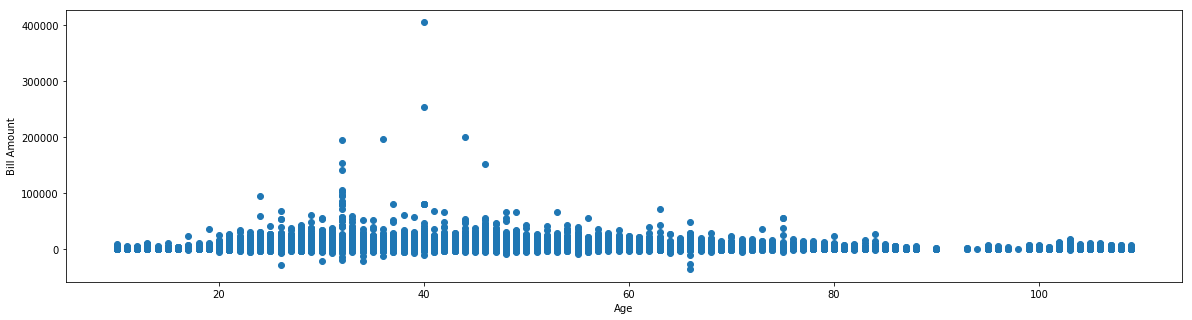

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.scatter(txn_correct_DOB_df['age'], txn_correct_DOB_df['payment_amount_by_tender'])
plt.xlabel('Age')
plt.ylabel('Bill Amount')

plt.show()

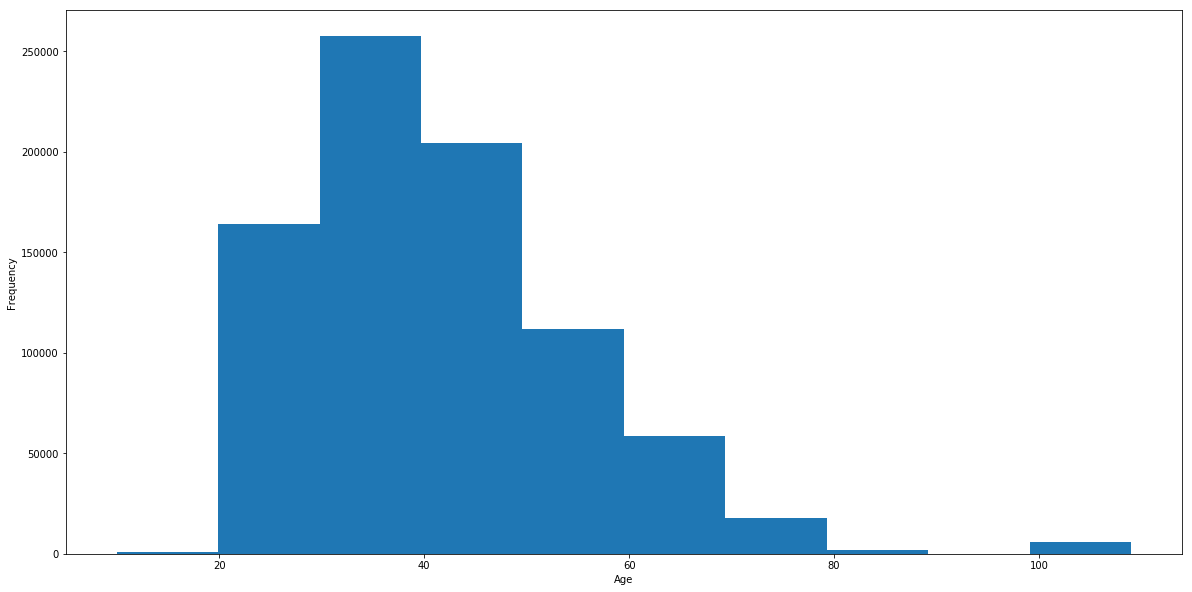

In [31]:
# Customers' age histogram 
plt.figure(figsize=(20,10))
plt.xlabel('Age')
txn_correct_DOB_df['age'].plot.hist(orientation='vertical', cumulative=False)

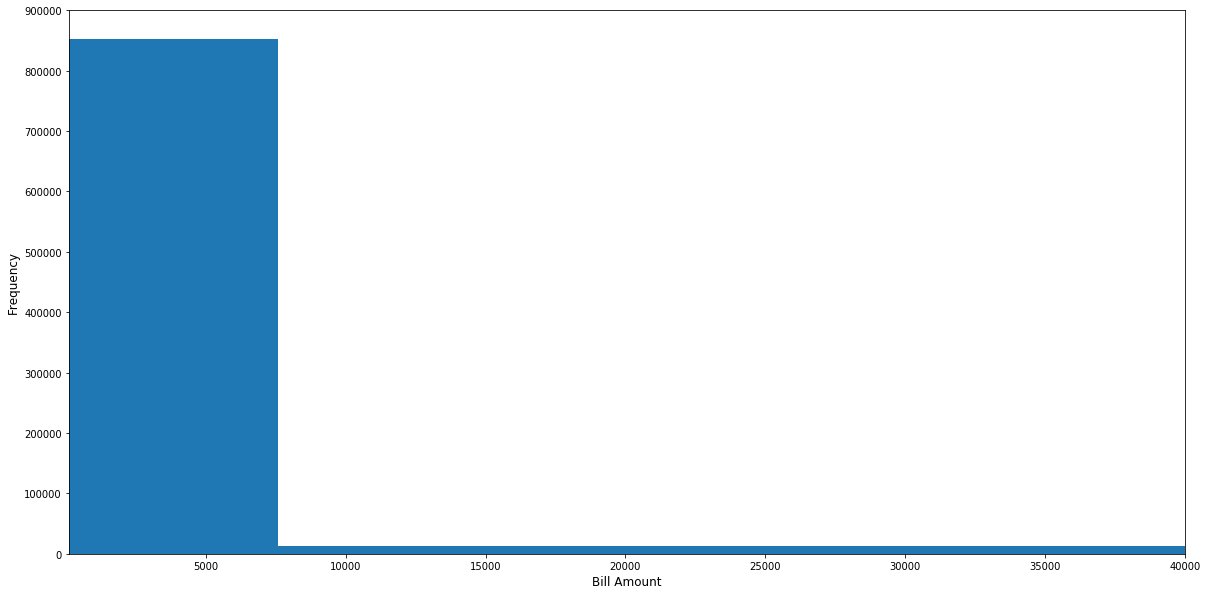

In [32]:
# Bill Amount histogram 
plt.figure(figsize=(20,10))
plt.xlabel('Bill Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axis([100, 40000, 100, 900000])
txn_df['payment_amount_by_tender'].plot.hist(orientation='vertical', cumulative=False)

[('CASH', 349375), ('BBProfitClub', 92707), ('UBI CREDIT CARD', 80308), ('SBI CREDIT CARD', 77104), ('HDFC CREDIT CARD', 47144), ('ICICI CREDIT CARD', 46339), ('AXIS', 32426), ('Payback', 25447), ('GiftVoucher', 19738), ('FuturePay', 16942)]


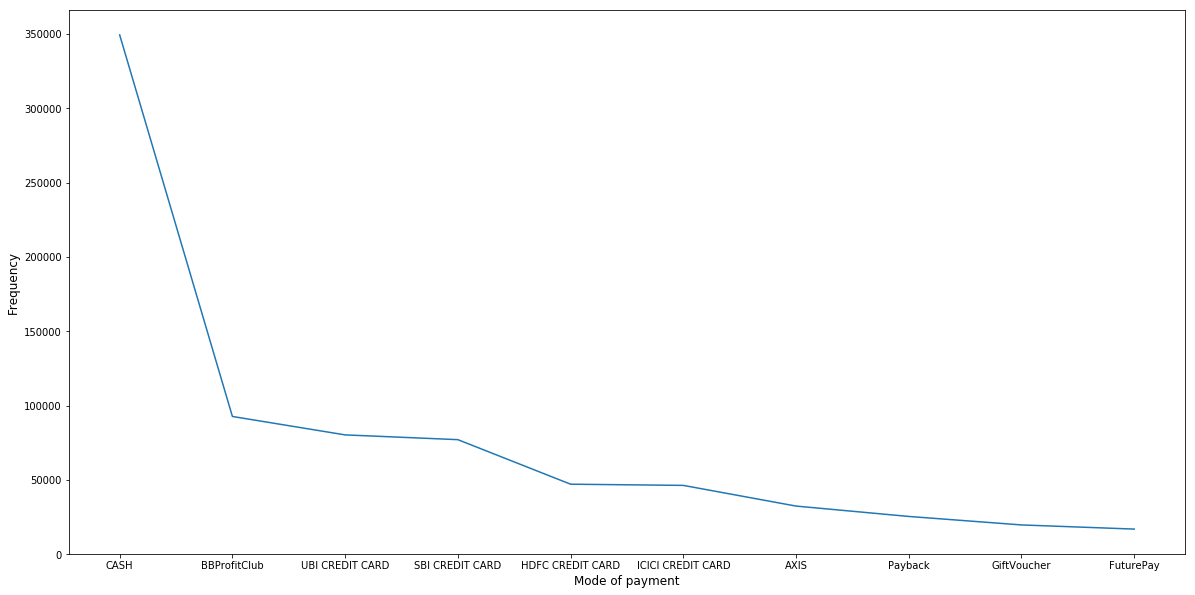

In [33]:
payment_method_counts_dict = txn_df['PaymentUsed'].value_counts().to_dict()

lists = sorted(payment_method_counts_dict.items()) # sorted by key, return a list of tuples

import operator
sorted_x = sorted(payment_method_counts_dict.items(), key=operator.itemgetter(1),reverse=True)[:10]

print(sorted_x)

x, y = zip(*lists) # unpack a list of pairs into two tuples
x2, y2 = zip(*sorted_x) # unpack a list of pairs into two tuples

plt.figure(figsize=(20,10))
plt.xlabel('Mode of payment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.plot(x2, y2)
plt.show()


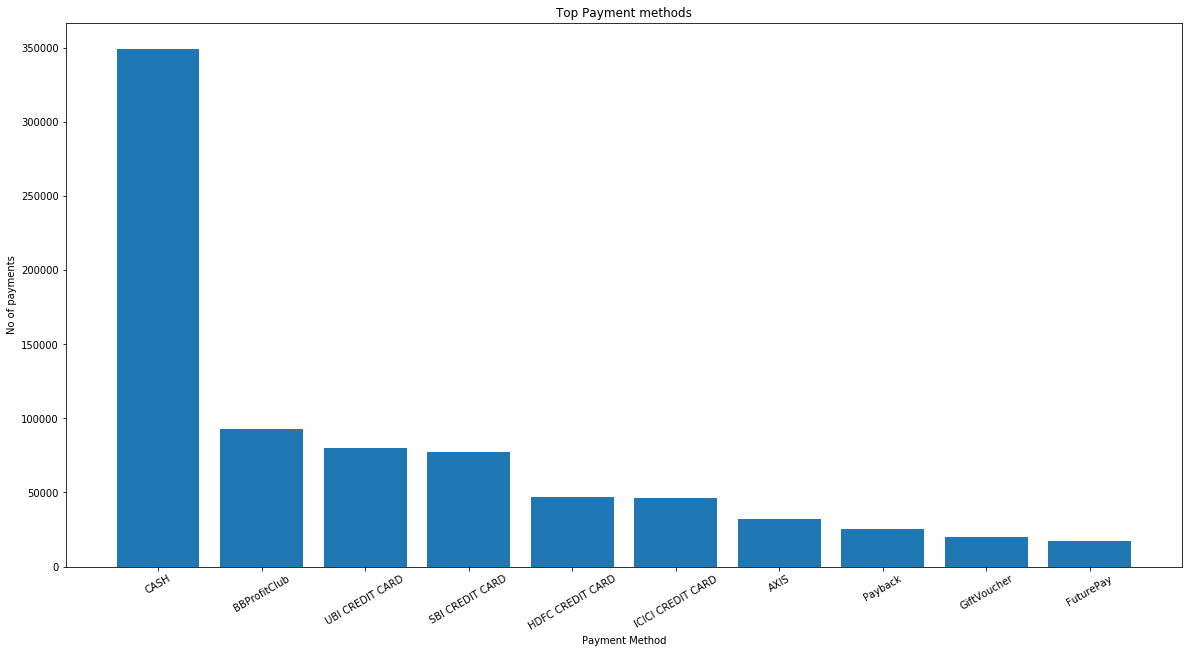

In [34]:
    import numpy as np
    index = np.arange(len(x2))
    plt.figure(figsize=(20,10))
    plt.bar(index, y2)
    plt.xlabel('Payment Method', fontsize=10)
    plt.ylabel('No of payments', fontsize=10)
    plt.xticks(index, x2, fontsize=10, rotation=30)
    plt.title('Top Payment methods')
    
    plt.show()

[('male', 582988), ('female', 189630)]


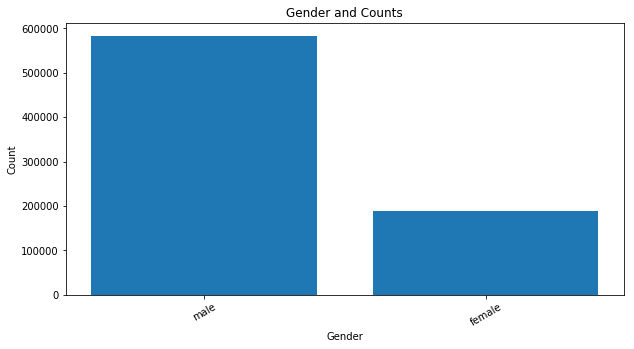

In [35]:
gender_dict = txn_correct_DOB_df['Gender'].value_counts().to_dict()

gender_lists = sorted(payment_method_counts_dict.items()) # sorted by key, return a list of tuples

import operator
sorted_gender = sorted(gender_dict.items(), key=operator.itemgetter(1),reverse=True)[:10]

print(sorted_gender)

gender, count = zip(*sorted_gender) # unpack a list of pairs into two tuples

import numpy as np
index = np.arange(len(gender))
plt.figure(figsize=(10,5))
plt.bar(index, count)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(index, gender, fontsize=10, rotation=30)
plt.title('Gender and Counts')    
plt.show()

In [36]:
data_t = {'Description':['No. of records in the dataset',
                       'No. of unqiue orders',
                       'No. of unqiue till numbers',
                       'No. of unqiue customers',
                       'No. of unqiue stores',
                       'Start date',
                       'End date',
                       'No. of days data available'
                      ],
        'Value':[len(txn_df),
                 len(txn_df.transaction_number_by_till.unique()),
                 len(txn_df.till_no.unique()),
                 len(txn_df.customerID.unique()),
                 len(txn_df.store_code.unique()),
                 txn_df['transactionDate'].min(),
                 txn_df['transactionDate'].max(),
                 #(datetime.strptime(txn_df['transactionDate'], '%Y-%m-%d').max()-datetime.strptime(txn_df['transactionDate'],'%Y-%m-%d').min()).days
                 (pd.to_datetime(txn_df['transactionDate'], format='%Y-%m-%d').max()-pd.to_datetime(txn_df['transactionDate'], format='%Y-%m-%d').min()).days
                ]
       }
df_t = pd.DataFrame(data_t)

df_t

,Description,Value
0,No. of records in the dataset,866277
1,No. of unqiue orders,100052
2,No. of unqiue till numbers,25
3,No. of unqiue customers,164079
4,No. of unqiue stores,7
5,Start date,2015-05-01
6,End date,2017-06-30
7,No. of days data available,791


In [37]:
print("Count of all transactions: " + str(len(txn_df)))
print("Count of transactions with unique transaction_number_by_till: " + str(len(txn_df.transaction_number_by_till.unique())))

Count of all transactions: 866277
Count of transactions with unique transaction_number_by_till: 100052


In [38]:
txn_df['transaction_number_by_till'].value_counts(dropna=False).head(10)

18798    32
19407    29
21093    29
6327     28
43174    28
20316    26
7924     26
24116    26
18714    25
54165    25
Name: transaction_number_by_till, dtype: int64

In [39]:
txn_df[txn_df['transaction_number_by_till'] == 18798].head(5)

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
17899,17899,MMID_2043103,1988-05-22,male,MADHYA PRADESH,452001,2016-10-04,2906,MM-INDORE-TREASURE ISLAND,13,CASH,18798,95.00,CASH
32433,32433,MMID_2047300,1972-01-28,male,MADHYA PRADESH,482002,2017-05-28,2655,MM-INDORE-MALHAR MEGA MALL,2,CASH,18798,5562.60,CASH
37259,37259,MMID_2048213,1954-11-08,male,PUNJAB,143001,2016-03-19,2615,MM-AMRITSAR-TRILIUM MALL,15,EDCHDFC,18798,2262.50,HDFC CREDIT CARD
84174,84174,MMID_20419533,1960-07-25,male,TAMIL NADU,625533,2016-05-01,4986,MM-MADURAI-KOCHADAI VILLAGE,20,CASH,18798,1634.00,CASH
93124,93124,MMID_204118753,1974-12-25,female,NaN,NaN,2016-09-24,2906,MM-INDORE-TREASURE ISLAND,8,CASH,18798,264.87,CASH


In [40]:
txn_df[txn_df['transaction_number_by_till'] == 18798].head(10).to_csv('/Users/svattiku/del.csv')

In [41]:
print(txn_df.store_description.unique())

['MM-INDORE-MALHAR MEGA MALL' 'MM-LUDHIANA-FEROZEPUR-MF'
 'MM-MADURAI-KOCHADAI VILLAGE' 'MM-INDORE-TREASURE ISLAND'
 'MM-AMRITSAR-TRILIUM MALL' 'MM-HUBLI-GOKUL ROAD-AKSHAY CEN'
 'MM-JAMSHEDPUR-NH-33']


In [42]:
product_df.till_no.unique()

array([ 2, 21, 11, 12, 10, 13,  4, 19,  9,  1,  5, 16,  6,  3,  7, 20, 14,
        8, 15, 17, 22, 18, 25, 24, 23])

In [43]:
len(product_df.till_no.unique())

25

In [44]:
store_sales = txn_df.groupby('store_description')['payment_amount_by_tender'].sum().reset_index()
store_sales = store_sales.sort_values('payment_amount_by_tender', ascending=False)

<BarContainer object of 7 artists>

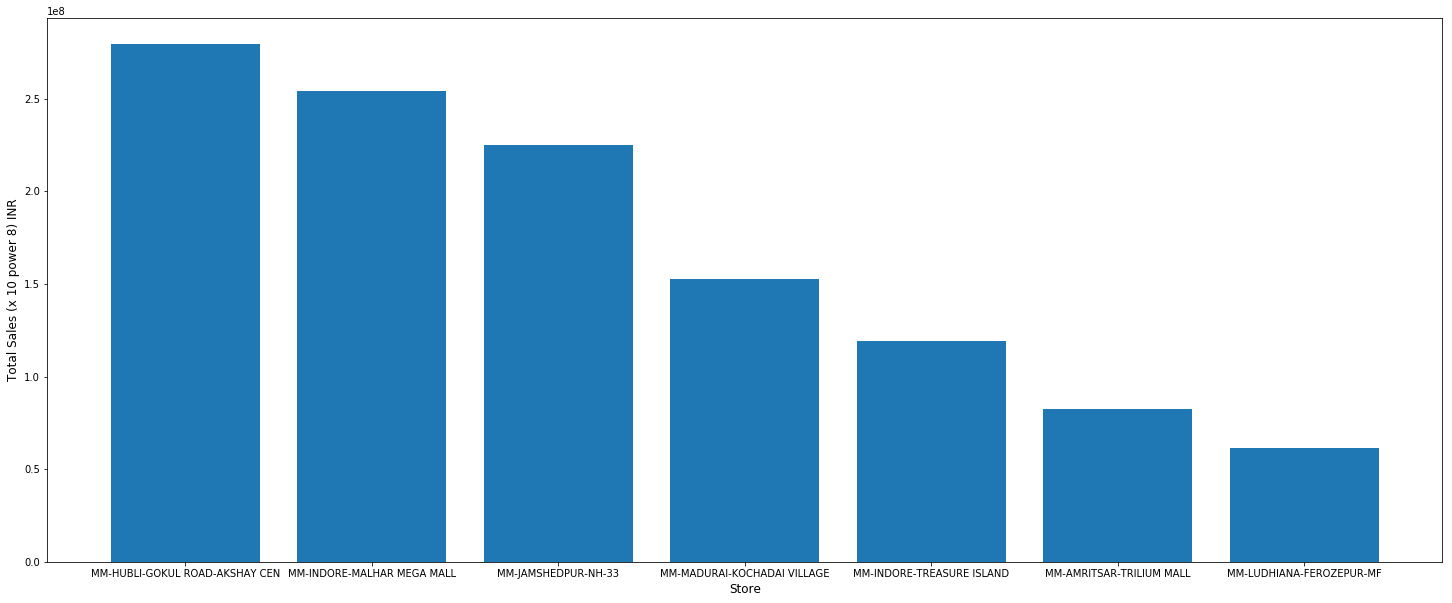

In [45]:
plt.figure(figsize=(25,10))
plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Sales (x 10 power 8) INR', fontsize=12)
plt.bar(store_sales['store_description'], store_sales['payment_amount_by_tender'])

In [46]:
store_sales.sort_values(by=['payment_amount_by_tender'], ascending=False)

,store_description,payment_amount_by_tender
1,MM-HUBLI-GOKUL ROAD-AKSHAY CEN,2.794858e+08
2,MM-INDORE-MALHAR MEGA MALL,2.539092e+08
4,MM-JAMSHEDPUR-NH-33,2.248645e+08
6,MM-MADURAI-KOCHADAI VILLAGE,1.526730e+08
3,MM-INDORE-TREASURE ISLAND,1.190414e+08
0,MM-AMRITSAR-TRILIUM MALL,8.245063e+07
5,MM-LUDHIANA-FEROZEPUR-MF,6.136135e+07


In [47]:
# Overall payments
txn_df['PaymentUsed'].value_counts(dropna=False).head(15)

CASH                    349375
BBProfitClub             92707
UBI CREDIT CARD          80308
SBI CREDIT CARD          77104
HDFC CREDIT CARD         47144
ICICI CREDIT CARD        46339
AXIS                     32426
Payback                  25447
GiftVoucher              19738
FuturePay                16942
FGShoppingFest           16861
Cash Back                15960
NaN                       7065
FoodCoupon                6995
CREDIT NOTE (ISSUES)      6832
Name: PaymentUsed, dtype: int64

In [48]:
# Storewise payments
store_payment_series = txn_df.groupby('store_description')['PaymentUsed'].value_counts(dropna=False, sort=True)
print(store_payment_series)

#store_payment_df = pd.DataFrame(store_payment_series)
#store_payment_df = store_payment_df.reset_index(drop=True)
#store_payment_df.columns = ['UniqueValue','PaymentUsedCount']
#print(store_payment_df)


store_description            PaymentUsed         
MM-AMRITSAR-TRILIUM MALL     CASH                    24505
                             BBProfitClub            19345
                             UBI CREDIT CARD          5153
                             GiftVoucher              3996
                             SBI CREDIT CARD          2519
                             FuturePay                2435
                             HDFC CREDIT CARD         2141
                             ICICI CREDIT CARD        1690
                             Payback                  1097
                             CreditNote                714
                             AXIS                      537
                             FGShoppingFest            494
                             Cash Back                 440
                             NaN                       395
                             Store Privilage Card      390
                             CREDIT NOTE (ISSUES)      365
      

In [49]:
txn_df.head(5)

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,0,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,EDCHDFC,51535,672.00,HDFC CREDIT CARD
1,1,MMID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,43394,35.00,Payback
2,2,MMID_2041,1981-10-18,male,NaN,452001,2016-05-01,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,47586,34.20,Payback
3,3,MMID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,MM-INDORE-MALHAR MEGA MALL,21,PYOC,39335,92.00,Payback
4,4,MMID_2041,1981-10-18,male,NaN,452001,2016-03-20,2655,MM-INDORE-MALHAR MEGA MALL,2,PYOC,72624,32.75,Payback


/Users/svattiku/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


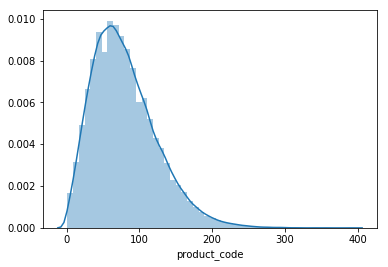

In [52]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
orders_sku_df = product_df.groupby('transaction_number_by_till')['product_code'].count().reset_index()
sn.distplot(orders_sku_df.product_code)




In [53]:
orders_sku_df.head(5)

,transaction_number_by_till,product_code
0,1,32
1,2,108
2,3,81
3,4,42
4,5,65


In [54]:
orders_skus = orders_sku_df[orders_sku_df.product_code > 1]['transaction_number_by_till']
orders_skus.head(5)

0    1
1    2
2    3
3    4
4    5
Name: transaction_number_by_till, dtype: int64

In [55]:
len(orders_skus)

99866

In [56]:
product_df = product_df[product_df.transaction_number_by_till.isin(list(orders_skus))]

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
product_df['quantity'] = 1

# Below like crashes the kernel
#product_pivot_df = pd.pivot_table(product_df, index = 'transaction_number_by_till', 
#                         columns = 'product_code',
#                         values ='quantity',
#                         fill_value = 0)
#product_pivot_df = product_pivot_df.fillna(0)

In [ ]:
#product_pivot_df

In [57]:
product_df.head(5)

,Unnamed: 0,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,0,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,300785147.0,BB-CB-16X20X168SWG-Suitable for ROI New,2.0,Payback
1,1,MMID_2041,1981-10-18,male,NaN,452001,2016-06-21,2655,MM-INDORE-MALHAR MEGA MALL,21,57836,NONPROMO,NaN,1000315939.0,SOO FRESH ROLL PIZZA 1PLT,40.0,Payback
2,2,MMID_2041,1981-10-18,male,NaN,452001,2016-04-07,2655,MM-INDORE-MALHAR MEGA MALL,21,43394,NONPROMO,NaN,1000314595.0,SOO FRESH PUFF PEAS & POTATO 1PLT,35.0,Payback
3,3,MMID_2041,1981-10-18,male,NaN,452001,2016-03-19,2655,MM-INDORE-MALHAR MEGA MALL,21,39335,NONPROMO,NaN,300930107.0,SOFRSH VD EGGS REGULAR 6P,72.0,Payback
4,4,MMID_2041,1981-10-18,male,NaN,452001,2016-01-19,2655,MM-INDORE-MALHAR MEGA MALL,2,51535,NONPROMO,NaN,1000010393.0,SOO FRESH BREAD BROWN 400g,15.0,Payback


In [58]:
product_df['product_description'].value_counts()

BB-CB-27X30X208SWG NEW                      60992
BB-CB-20X25X208SWG NEW                      58436
SUGAR MEDIUM LOOSE                          51336
BB-CB-20X25X168SWG-Suitable for ROI New     41500
TOMATO LOOSE                                35307
BB-CB-27X30X168SWG-Suitable for ROI New     34794
Fiber bag 45 GSM 20x25                      31149
ONION LOOSE                                 27963
TATA SALT PP 1Kg                            27727
POTATO LOOSE                                25360
CORIANDER                                   24668
TUR DAL PREM LOOSE                          23638
BB-CB-16X20X208SWG NEW                      22528
PB Card FVRL                                21803
CUCUMBER GREEN LOOSE                        21204
MAGGI NDL MASALA 420g                       21037
Carrot English Loose                        20174
CAPSICUM GREEN                              19628
LEMON LOOSE                                 17676
LADYFINGER LOOSE                            16987


In [59]:
product_df_txn_prod = product_df[['transaction_number_by_till', 'product_description']].copy()

In [60]:
product_df_txn_prod.head(10)

,transaction_number_by_till,product_description
0,51535,BB-CB-16X20X168SWG-Suitable for ROI New
1,57836,SOO FRESH ROLL PIZZA 1PLT
2,43394,SOO FRESH PUFF PEAS & POTATO 1PLT
3,39335,SOFRSH VD EGGS REGULAR 6P
4,51535,SOO FRESH BREAD BROWN 400g
5,47586,RIDGE GOURD
6,72624,BOTTLE GOURD LONG
7,72624,CORIANDER
8,72624,CAULIFLOWER
9,51535,ECO VALLEY OATS HEARTY PLAIN PP 1kg


In [61]:
uniqueTrxnIDsArray = product_df_txn_prod.transaction_number_by_till.unique()

In [62]:
len(uniqueTrxnIDsArray)

99866

In [63]:
type(uniqueTrxnIDsArray)

numpy.ndarray

In [64]:
uniqueTrxnIDsArray[0:10]

array([51535, 57836, 43394, 39335, 47586, 72624, 39496, 55053,  5229,
       86017])

In [65]:
uniqueTrxnIDsArray[1:10]

array([57836, 43394, 39335, 47586, 72624, 39496, 55053,  5229, 86017])

In [66]:
product_unique_txn_prod_df = product_df_txn_prod.drop_duplicates(subset='transaction_number_by_till', keep='first', inplace=False)

In [67]:
len(product_unique_txn_prod_df)

99866

In [ ]:
#product_df_txn_prod['quantity'] = 1
product_unique_txn_prod_df['quantity'] = 1
myPivot = product_unique_txn_prod_df.pivot(index = 'transaction_number_by_till', 
                         columns = 'product_description',
                         values ='quantity')
myPivot = myPivot.fillna(0)

In [ ]:
myPivot

In [ ]:
frequent_itemsets = apriori(myPivot,
                           min_support=0.000001,
                           use_colnames=True)

In [ ]:
item_rules = association_rules(frequent_itemsets,
                              metric='lift',
                              min_threshold=1.0)

In [ ]:
type(item_rules)

In [ ]:
item_rules.head(5)

In [68]:
product_unique_txn_prod_df.head(5)

,transaction_number_by_till,product_description
0,51535,BB-CB-16X20X168SWG-Suitable for ROI New
1,57836,SOO FRESH ROLL PIZZA 1PLT
2,43394,SOO FRESH PUFF PEAS & POTATO 1PLT
3,39335,SOFRSH VD EGGS REGULAR 6P
5,47586,RIDGE GOURD


In [69]:
frequent_itemsets.head(5)

NameError: name 'frequent_itemsets' is not defined

In [ ]:
sku_desc_dict = dict(zip(product_df.product_code,
                        product_df.product_description))

In [ ]:
item_rules['lhs_item'] = item_rules.antecedents.map(lambda x: sku_desc_dict[list(x)[0]])
item_rules['rhs_item'] = item_rules.consequents.map(lambda x: sku_desc_dict[list(x)[0]])

In [ ]:
items_sorted_by_conf = item_rules[['lhs_item',
           'rhs_item',
            'support',
           'confidence',
           'lift']].sort_values('confidence', ascending = False)

In [ ]:
items_sorted_by_conf.head(5).sort_values('lift',ascending = False)